In [99]:
import re
import os
import glob
import importlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
#from ics.hxutils import hxramp
from h4rg_analysis import plot, ramputils
import makefigures_noise

In [2]:
datadir = '../data/output/'

In [3]:
frames = glob.glob(f'{datadir}/*utrparam.npy')

In [4]:
rampids = np.array([ re.findall(f'(?<={datadir})PF.*?(?=_)', x)[0] for x in frames ])
frametypes = np.array([ re.findall(f'(?<=_)corr|data|irp(?=_)', os.path.basename(x))[0] for x in frames ])

In [133]:
keyword = 'irp'
ramps = rampids[frametypes==keyword]
suffix = 'S0-E-1_utrparam.npy'

In [134]:
oarr = np.zeros([len(ramps), 4096, 4096])
for idx,cramp in enumerate(ramps):
    rate = np.load(f'{datadir}/{cramp}_{keyword}_{suffix}')
    oarr[idx] = rate[0] * 2.26/3.2 # XXX correction for gain typo

In [135]:
exptime = 10.85705
gain = 2.26
nreads = 300
kwargs = {'gain':gain,'nreads':nreads,'exptime':exptime}

In [85]:
# \\ tracking column variations from top / bot

In [106]:
rdiff = oarr[0]-oarr[1]
rdiff_mc,colmed_rdiff = ramputils.colsub ( rdiff, 1 )

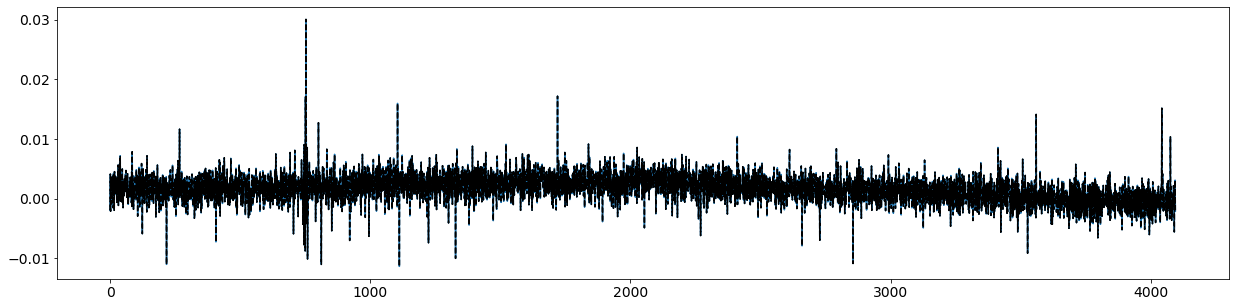

In [122]:
fig = plt.figure(figsize=(21,5))
plt.plot(np.median(rdiff[:4],axis=0))
plt.plot(np.median(rdiff[-4:],axis=0))
plt.plot(np.median(rdiff[4:-4],axis=0))
plt.plot(colmed_rdiff, ls='--', color='k')


Text(0, 0.5, '$\\Delta R$')

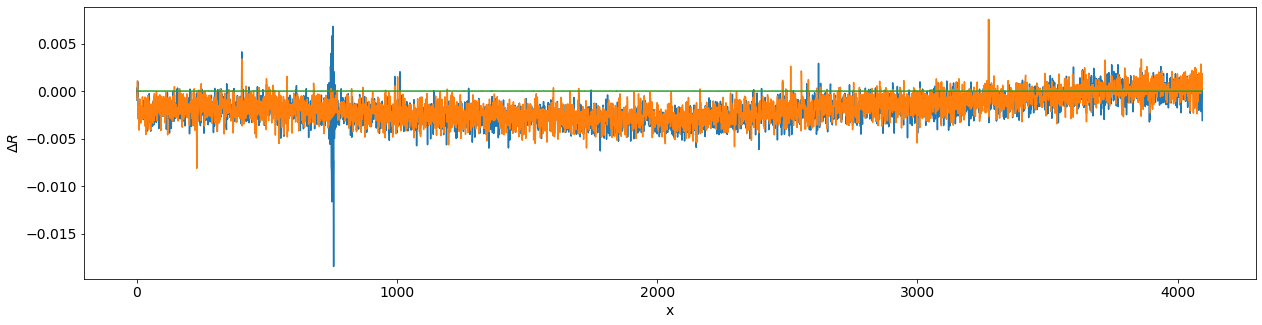

In [125]:
fig = plt.figure(figsize=(21,5))
plt.plot(np.median(rdiff[:4],axis=0) - colmed_rdiff)
plt.plot(np.median(rdiff[-4:],axis=0) - colmed_rdiff)
plt.plot(np.median(rdiff[4:-4],axis=0) - colmed_rdiff)
plt.xlabel ( 'x')
plt.ylabel ( r'$\Delta R$')

/tigress/kadofong/machine_harmony/repos_post0903/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/tigress/kadofong/machine_harmony/repos_post0903/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


(-50.0, 50.0)

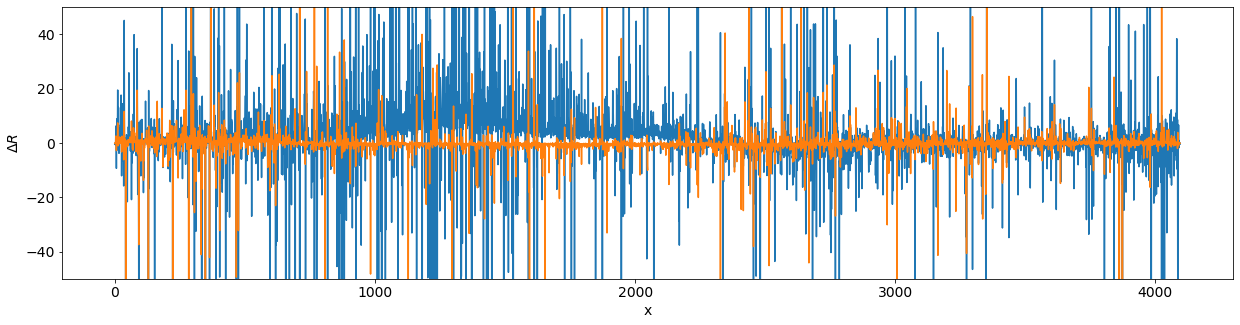

In [132]:
fig = plt.figure(figsize=(21,5))
plt.plot((np.median(rdiff[4:8],axis=0) - colmed_rdiff)/colmed_rdiff)
plt.plot((np.median(rdiff[-40:-4],axis=0) - colmed_rdiff)/colmed_rdiff)
plt.xlabel ( 'x')
plt.ylabel ( r'$\Delta R$')
plt.ylim(-50,50)

Median rate: 0.0109 e/s
Expected shot noise: 5 e
Observed total RMS: 28 e
SQRT[RMS^2 - shot^2] = 28.28 e
column subtracted
Median rate: 0.0109 e/s
Expected shot noise: 5 e
Observed total RMS: 8 e
SQRT[RMS^2 - shot^2] = 6.54 e


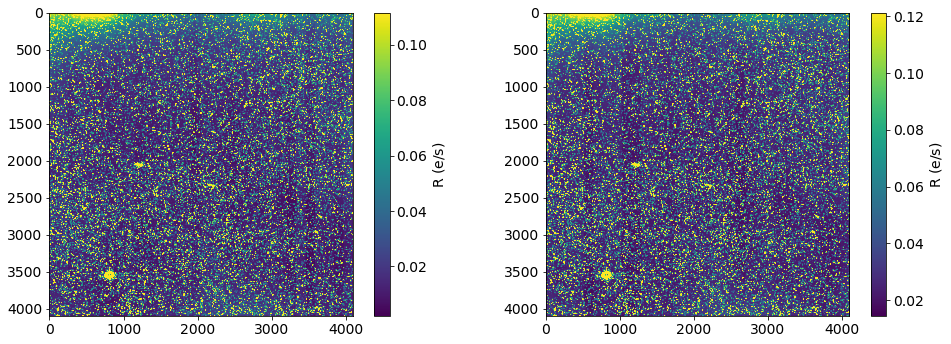

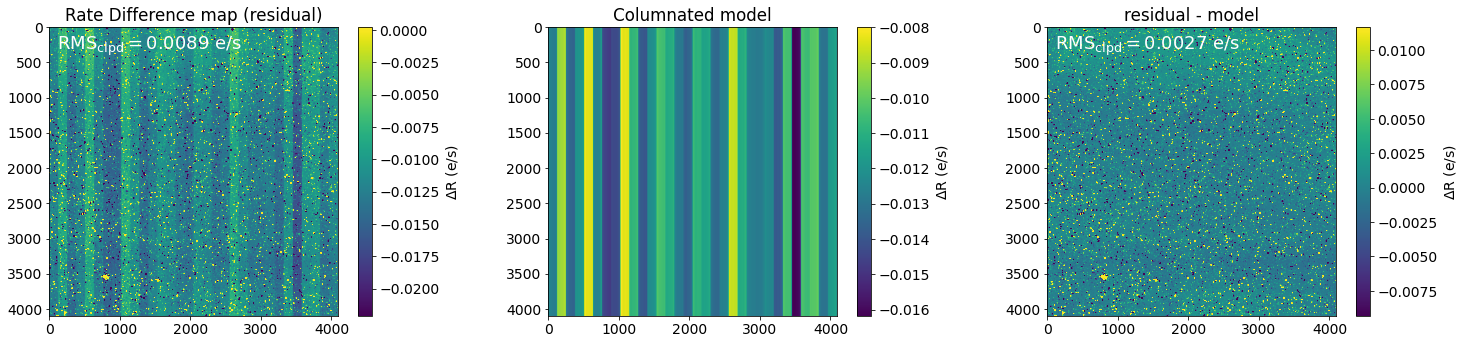

In [81]:
fig0,fig=makefigures_noise.show_r2rdiff ( oarr[0], oarr[1], **kwargs)
fig0.savefig(f'../figures/{keyword}RATE_{ramps[1]}-{ramps[0]}.png')
fig.savefig(f'../figures/{keyword}DELTAR_{ramps[1]}-{ramps[0]}.png')

Median rate: 0.0124 e/s
Expected shot noise: 6 e
Observed total RMS: 11 e
SQRT[RMS^2 - shot^2] = 9.78 e
column subtracted
Median rate: 0.0124 e/s
Expected shot noise: 6 e
Observed total RMS: 9 e
SQRT[RMS^2 - shot^2] = 6.73 e


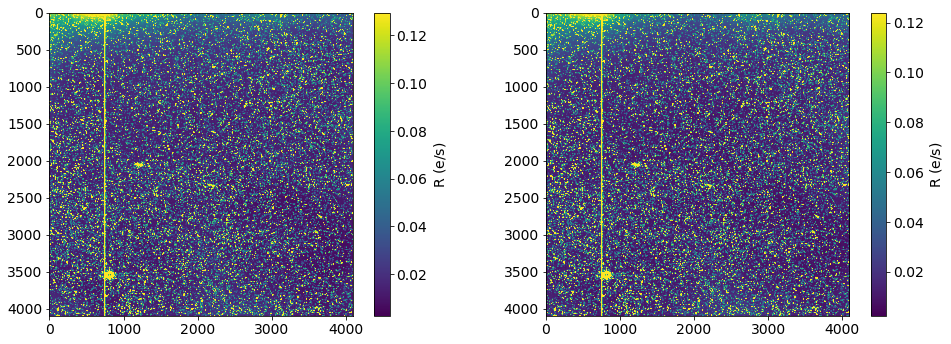

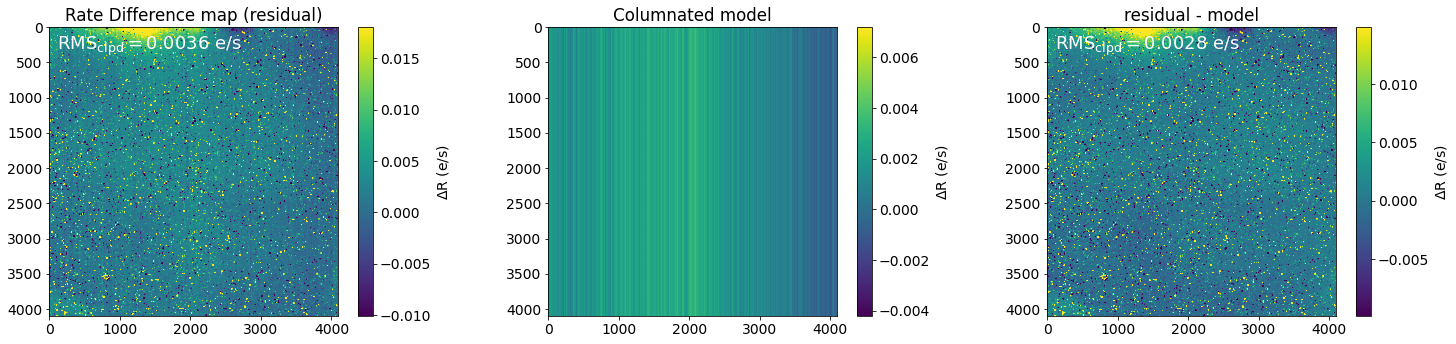

In [77]:
fig0,fig=makefigures_noise.show_r2rdiff ( oarr[0], oarr[1], **kwargs)
fig0.savefig(f'../figures/{keyword}DELTAR_{ramps[1]}-{ramps[0]}.png')
fig.savefig(f'../figures/{keyword}DELTAR_{ramps[1]}-{ramps[0]}.png')

<AxesSubplot:>

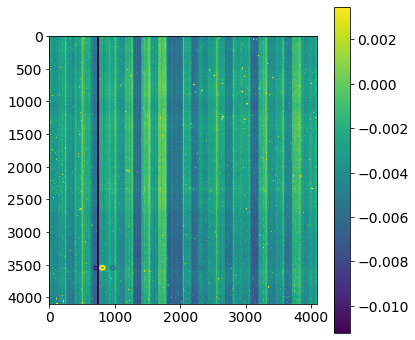

In [136]:
plot.scaled_imshow(oarr[0])

(-0.02, 0.05)

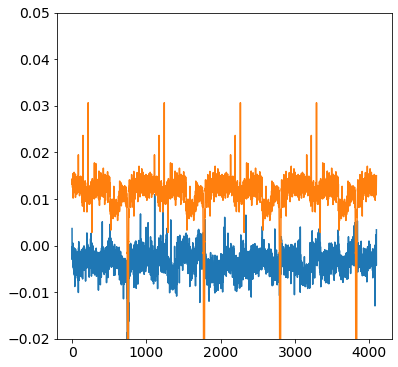

In [142]:
plt.plot(np.median(oarr[0], axis=0))
plt.plot(np.median(oarr[1], axis=0))
plt.ylim(-0.02,0.05)

Median rate: -0.0033 e/s
Expected shot noise: 3 e
Observed total RMS: 36 e
SQRT[RMS^2 - shot^2] = 35.86 e
column subtracted
Median rate: -0.0033 e/s
Expected shot noise: 3 e
Observed total RMS: 2 e
SQRT[RMS^2 - shot^2] = nan e


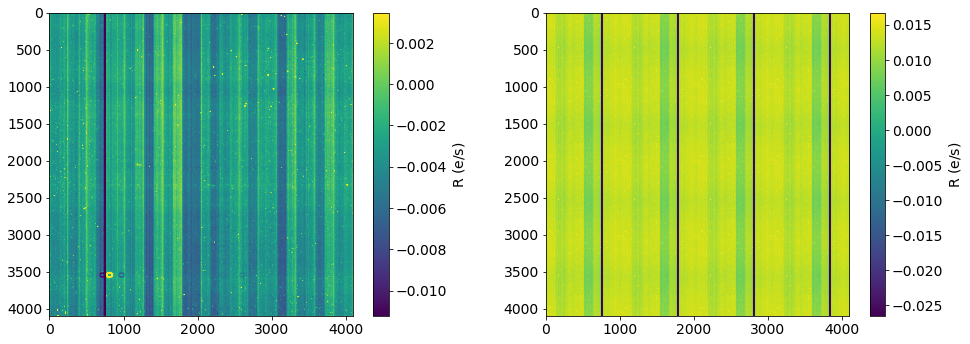

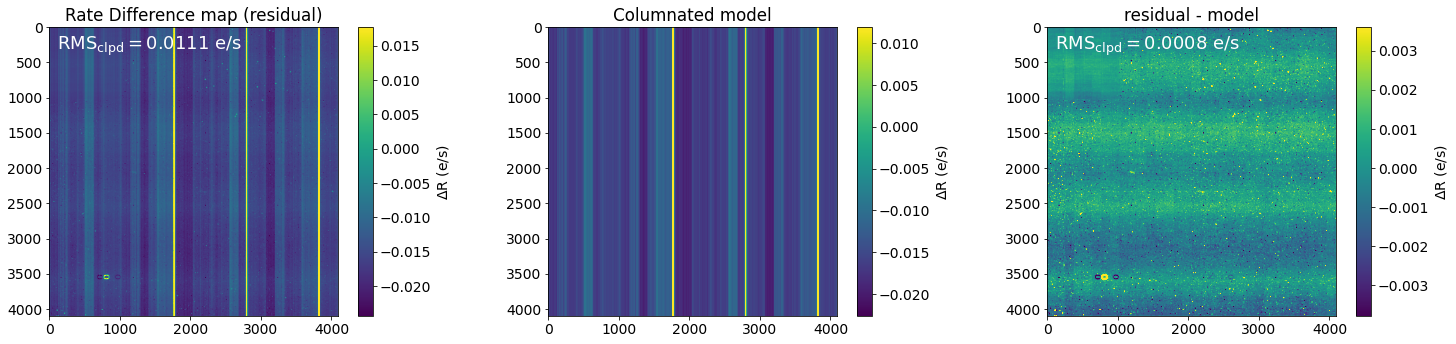

In [73]:
fig0,fig=makefigures_noise.show_r2rdiff ( oarr[0], oarr[1], **kwargs)
fig0.savefig(f'../figures/{keyword}DELTAR_{ramps[1]}-{ramps[0]}.png')
fig.savefig(f'../figures/{keywosrd}DELTAR_{ramps[1]}-{ramps[0]}.png')

Median rate: 0.0168 e/s
Expected shot noise: 7 e
Observed total RMS: 14 e
SQRT[RMS^2 - shot^2] = 12.03 e
column subtracted
Median rate: 0.0168 e/s
Expected shot noise: 7 e
Observed total RMS: 11 e
SQRT[RMS^2 - shot^2] = 8.89 e


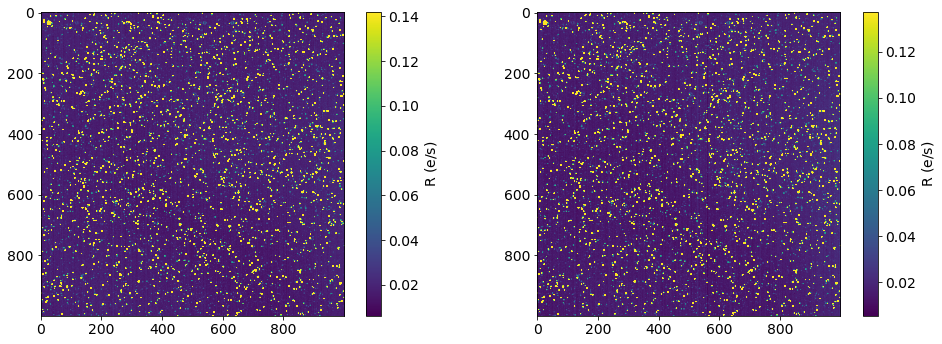

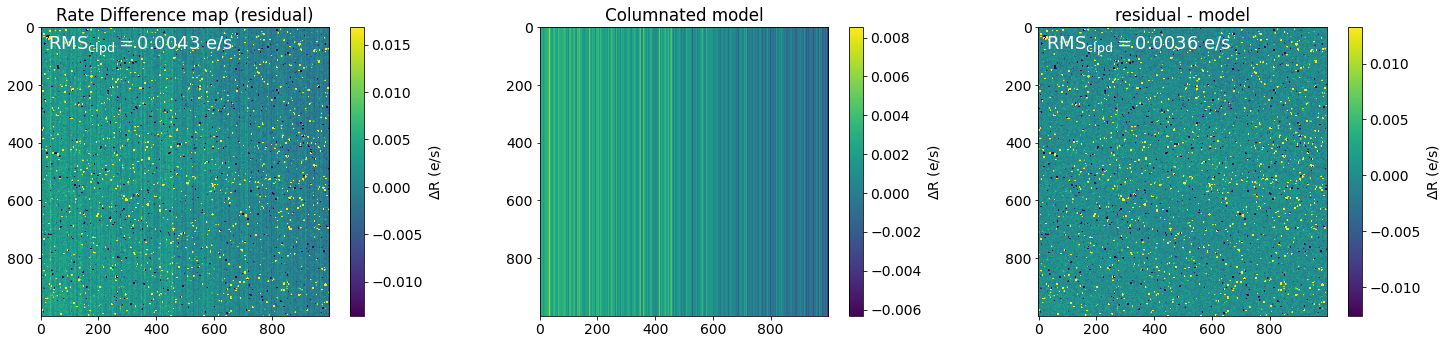

In [57]:
fig0,fig=makefigures_noise.show_r2rdiff ( oarr[0,1000:2000,3000:4000], oarr[1,1000:2000,3000:4000], **kwargs)

Median rate: 0.0175 e/s
Expected shot noise: 7 e
Observed total RMS: 16 e
SQRT[RMS^2 - shot^2] = 14.68 e


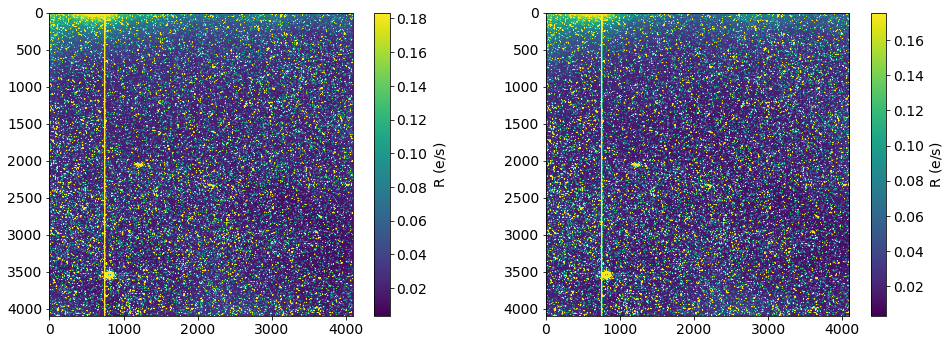

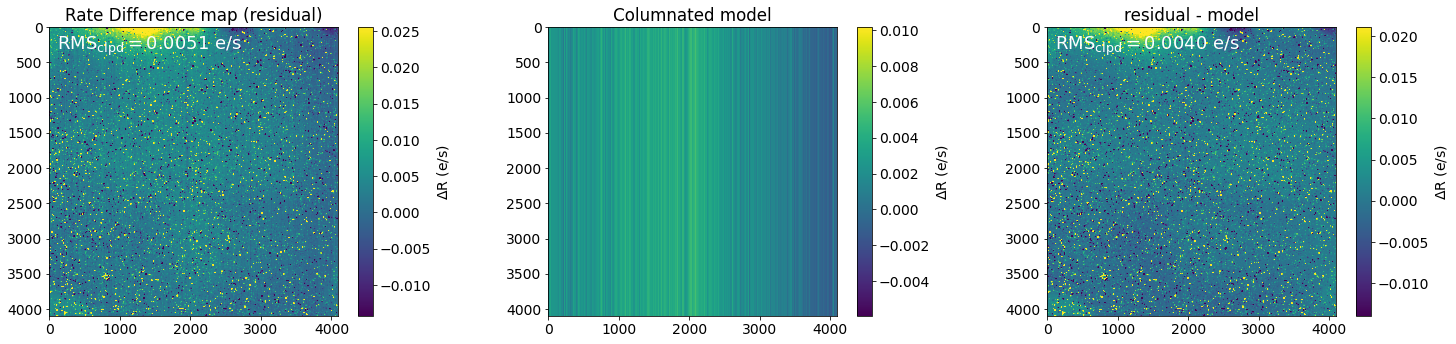

In [46]:
fig0,fig=makefigures_noise.show_r2rdiff ( oarr[0], oarr[1], **kwargs)
fig0.savefig(f'../figures/{keyword}DELTAR_{ramps[1]}-{ramps[0]}.png')
fig.savefig(f'../figures/{keyword}DELTAR_{ramps[1]}-{ramps[0]}.png')

Median rate: 0.0052 e/s
Expected shot noise: 4 e
Observed total RMS: 4 e
SQRT[RMS^2 - shot^2] = 2.59 e


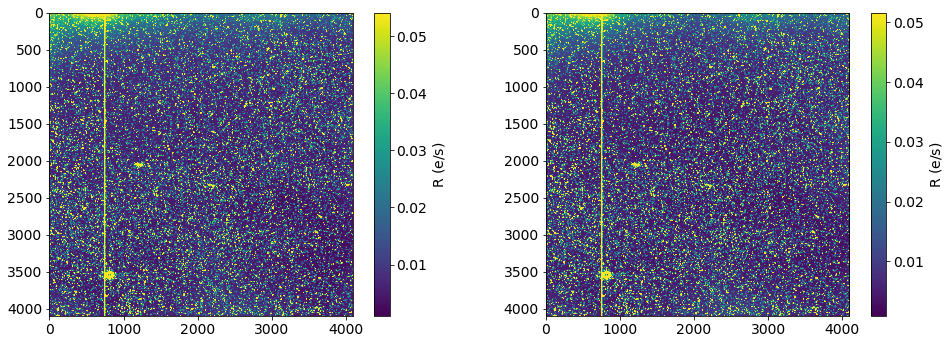

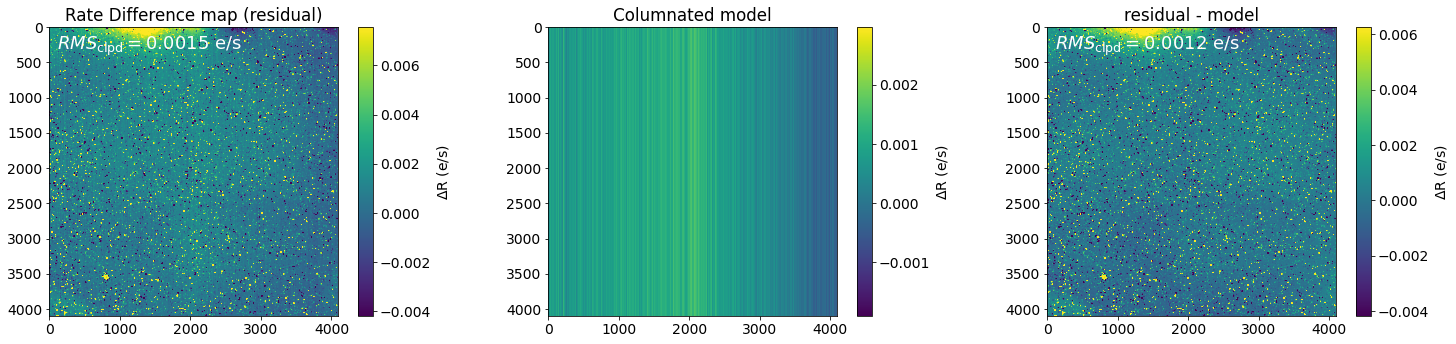

In [171]:
fig0,fig1 = makefigures_noise.show_r2rdiff ( oarr[0], oarr[2], **kwargs)
fig0.savefig(f'../figures/RATE_{ramps[2]}-{ramps[0]}.png')
fig1.savefig(f'../figures/DELTAR_{ramps[2]}-{ramps[0]}.png')

Median rate: 0.0052 e/s
Expected shot noise: 4 e
Observed total RMS: 4 e
SQRT[RMS^2 - shot^2] = 0.94 e


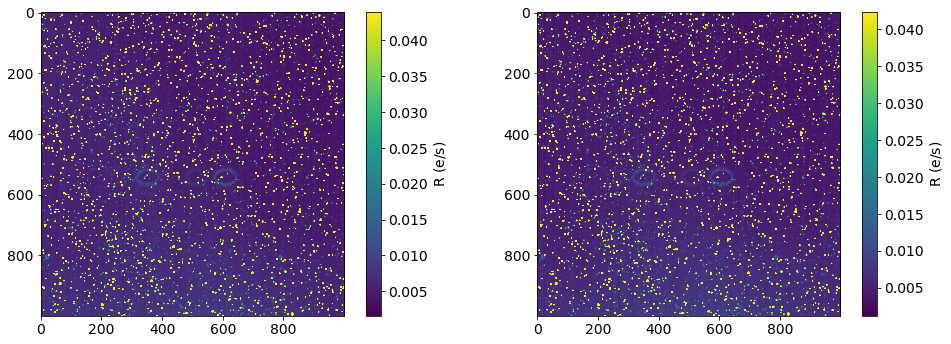

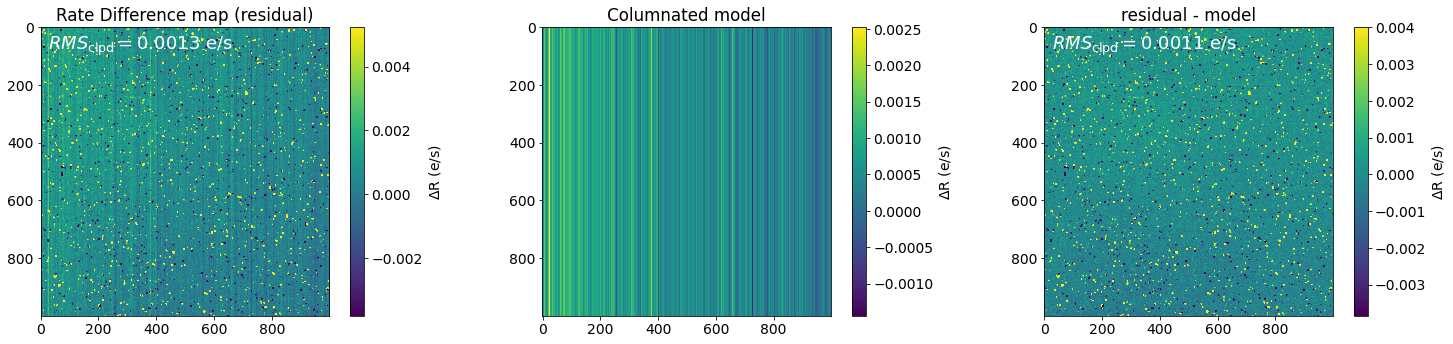

In [170]:
fig0,fig1=makefigures_noise.show_r2rdiff ( oarr[0,3000:4000,2000:3000], oarr[2,3000:4000,2000:3000], **kwargs)
fig0.savefig(f'../figures/RATE_{ramps[2]}-{ramps[0]}_3000-4000_2000-3000.png')
fig1.savefig(f'../figures/DELTAR_{ramps[2]}-{ramps[0]}_3000-4000_2000-3000.png')

/tigress/kadofong/machine_harmony/repos_post0903/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == "__main__":


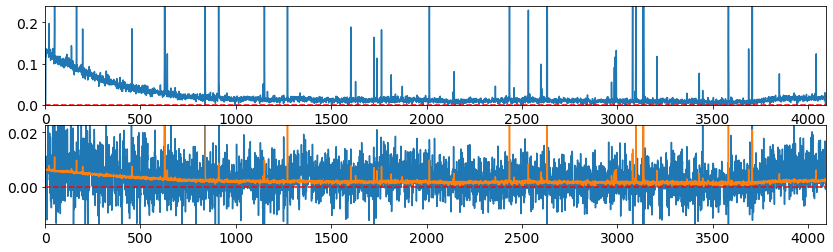

In [158]:
fig, axarr = plt.subplots(2,1, figsize=(14,4))

cidx=200
deltays = rdiff[:,cidx]
ys = oarr[0,:,cidx]

axarr[1].plot(deltays)
axarr[0].plot(ys)
axarr[1].plot(np.sqrt(ys*exptime*nreads) / (exptime*nreads))

for ax in axarr:
    ax.set_xlim(0,4096)
    ax.axhline(0., ls='--', color='r')
plot.scale_ylim(ys, axarr[0])
plot.scale_ylim(deltays, axarr[1])

In [176]:
irp0 = np.load('../data/output/PFJB02395823_irp_S0-E-1_utrparams0.npy')
irp1 = np.load('../data/output/PFJB02402223_irp_S0-E-1_utrparams0.npy')

In [180]:
irpdiff = irp0[0]-irp1[0]

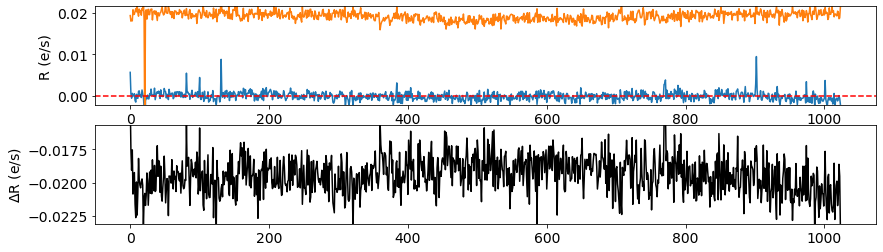

In [191]:
fig, axarr = plt.subplots(2,1, figsize=(14,4))

cidx=20
deltays = irpdiff[:,cidx]
ys = np.concatenate([irp0[0,:,cidx],irp1[0,:,cidx]]) #- irp0[0,:,cidx].mean()

axarr[1].plot(deltays, color='k')
axarr[0].plot(irp0[0,:,cidx]) # - irp0[0,:,cidx].mean())
axarr[0].plot(irp1[0,:,cidx]) # - irp1[0,:,cidx].mean())
#axarr[1].plot(np.sqrt(ys*exptime*nreads) / (exptime*nreads))

for ax in axarr:
    #ax.set_xlim(0,4096)
    ax.axhline(0., ls='--', color='r')
    
axarr[0].set_ylabel ( 'R (e/s)')
axarr[1].set_ylabel ( r'$\Delta$R (e/s)')
plot.scale_ylim(ys, axarr[0])
plot.scale_ylim(deltays, axarr[1])

Median rate: -0.0012 e/s
Expected shot noise: 1 e
Observed total RMS: 14 e
SQRT[RMS^2 - shot^2] = 14.34 e


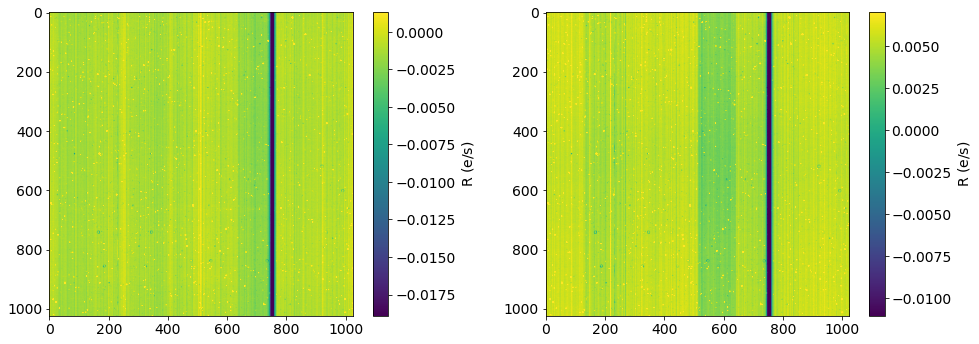

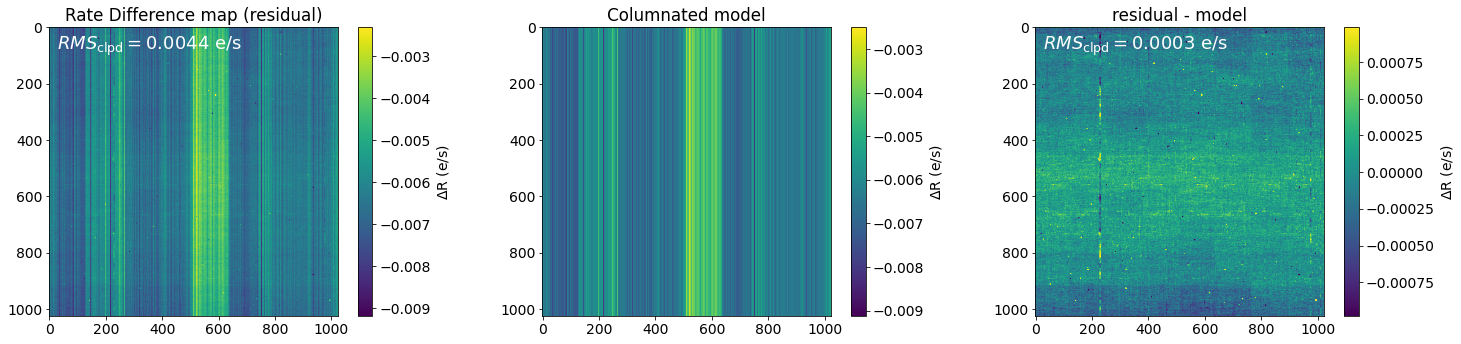

In [179]:
fig0,fig1=makefigures_noise.show_r2rdiff ( irp0[0],irp1[0], **kwargs)